In [1]:
import sys
import os
import numpy as np
import h5py
import scipy.io
import math

In [2]:
path_to_data = "/Users/storm/git/Multi-resBind/Data/data_RBPslow.h5"

In [3]:
def create_class_weight(labels_dict,total,mu=0.15):
    keys = labels_dict.keys()
    class_weight = dict()
    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0
    return class_weight

In [4]:
data = h5py.File(path_to_data,'r')
y_train = np.array(data['train_out'])

In [5]:
num_task = 27
total=y_train.shape[0]
labels_dict=dict(zip(range(num_task),[sum(y_train[:,i]) for i in range(num_task)]))
class_weight=create_class_weight(labels_dict,total,mu=0.5)

In [6]:
print (class_weight)

{0: 1.2863919735689238, 1: 2.5430673352150244, 2: 2.4887870533281977, 3: 3.3921661866338306, 4: 1.6417326944945194, 5: 1.6067358524574233, 6: 2.154691489875446, 7: 3.152958870684461, 8: 2.282400070237021, 9: 3.4765998735236856, 10: 3.4384358705779277, 11: 3.815133730391768, 12: 1.7714358079015584, 13: 3.8970508528596546, 14: 2.9933830094885407, 15: 2.8267089981298006, 16: 3.872953301280594, 17: 2.6076358463059637, 18: 1.8215368745964946, 19: 1.8334129763529443, 20: 2.066003666558564, 21: 2.5042446389048405, 22: 2.0447350841600143, 23: 3.0104652753994157, 24: 3.6443823282310195, 25: 3.4329443685842524, 26: 1.8786695679410652}


In [7]:
print (labels_dict)

{0: 7811, 1: 2223, 2: 2347, 3: 951, 4: 5475, 5: 5670, 6: 3278, 7: 1208, 8: 2885, 9: 874, 10: 908, 11: 623, 12: 4809, 13: 574, 14: 1417, 15: 1674, 16: 588, 17: 2084, 18: 4574, 19: 4520, 20: 3582, 21: 2311, 22: 3659, 23: 1393, 24: 739, 25: 913, 26: 4320}


In [8]:
print (list(labels_dict.values()))

[7811, 2223, 2347, 951, 5475, 5670, 3278, 1208, 2885, 874, 908, 623, 4809, 574, 1417, 1674, 588, 2084, 4574, 4520, 3582, 2311, 3659, 1393, 739, 913, 4320]


In [9]:
labels_values = np.array(list(labels_dict.values()))
RBPnames_low=np.array(['MBNL1', 'P53_NONO', 'PUM2', 'QKI', 'AGO3', 'FUS', 'TAF15', 'ZFP36', 'DICER1', 'EIF3A', 'EIF3D', 'EIF3G', 'SSB', 'PAPD5', 'CPSF4', 'CPSF3', 'RTCB', 'FXR1', 'NOP58', 'NOP56', 'FBL', 'LIN28A', 'LIN28B', 'UPF1', 'G35', 'G45', 'XPO5'])

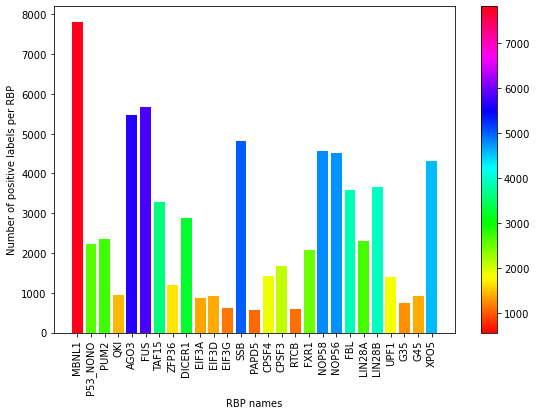

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm
f = plt.figure(figsize=(9,6))
colors = cm.hsv(labels_values / float(max(labels_values)))
plot = plt.scatter(labels_values,labels_values, c = labels_values, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(RBPnames_low, labels_values, color = colors)
plt.xlabel('RBP names')
plt.ylabel("Number of positive labels per RBP")
plt.xticks(rotation = 90)
plt.show()
#f.savefig("positive_labels_per_RBP.pdf", bbox_inches='tight')